## Group 8
# Toba Tourism Recommendation System Project
#### 1. 12S21011 - Aldi Jeremy Simamora 
#### 2. 12S21034 - Lasni Sinta Uli Simanjuntak 
#### 3. 12S21036 - Astri Yuliana Siahaan

## Data Preparation

In [1]:
import pandas as pd

# Load the dataset to inspect its structure
file_path = 'C:/Users/Asus/Documents/SEMESTER 7/SISREK/PROJECT/Tempat-Wisata-Toba-Preprocessing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Unnamed: 0.1,Unnamed: 0,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews
0,0,0,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.126030e+20,5.0,NaN
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
2,2,2,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.078860e+20,5.0,NaN
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k


## Data Cleaning

In [2]:
# Data cleaning: Keep only relevant columns and drop rows with missing values in ReviewerId, PlaceID, and Rating
cleaned_data = data[['ReviewerId', 'PlaceID', 'Rating']].dropna()
cleaned_data['ReviewerId'] = cleaned_data['ReviewerId'].astype(int)
cleaned_data['PlaceID'] = cleaned_data['PlaceID'].astype(int)
cleaned_data['Rating'] = cleaned_data['Rating'].astype(float)

# Check the cleaned data
cleaned_data.info(), cleaned_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 43225 entries, 0 to 43225
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ReviewerId  43225 non-null  int32  
 1   PlaceID     43225 non-null  int32  
 2   Rating      43225 non-null  float64
dtypes: float64(1), int32(2)
memory usage: 1013.1 KB


(None,
    ReviewerId  PlaceID  Rating
 0 -2147483648        0     5.0
 1 -2147483648        0     5.0
 2 -2147483648        0     5.0
 3 -2147483648        0     5.0
 4 -2147483648        0     5.0)

## Check Unique ReviewerId

In [3]:
# Investigate unique ReviewerId values for issues
unique_reviewer_ids = cleaned_data['ReviewerId'].unique()

# Check if there are invalid or problematic IDs
unique_reviewer_ids[:10], len(unique_reviewer_ids)


(array([-2147483648]), 1)

In [4]:
# Check the raw data for ReviewerId column to understand the issue
data['ReviewerId'].unique(), data['ReviewerId'].head(10)


(array([1.12603e+20, 1.11909e+20, 1.07886e+20, ..., 1.03145e+20,
        1.10937e+20, 1.13074e+20]),
 0    1.126030e+20
 1    1.119090e+20
 2    1.078860e+20
 3    1.130720e+20
 4    1.061730e+20
 5    1.115720e+20
 6    1.142390e+20
 7    1.103400e+20
 8    1.047430e+20
 9    1.125610e+20
 Name: ReviewerId, dtype: float64)

In [5]:
# Convert ReviewerId to string to handle large unique IDs properly
cleaned_data['ReviewerId'] = data['ReviewerId'].astype(str)
cleaned_data['PlaceID'] = cleaned_data['PlaceID'].astype(int)
cleaned_data['Rating'] = cleaned_data['Rating'].astype(float)

# Re-check the cleaned data
cleaned_data.info(), cleaned_data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 43225 entries, 0 to 43225
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ReviewerId  43225 non-null  object 
 1   PlaceID     43225 non-null  int32  
 2   Rating      43225 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.2+ MB


(None,
     ReviewerId  PlaceID  Rating
 0  1.12603e+20        0     5.0
 1  1.11909e+20        0     5.0
 2  1.07886e+20        0     5.0
 3  1.13072e+20        0     5.0
 4  1.06173e+20        0     5.0)

## Data Split  train:validation:test 70%:15%:15%

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into train (70%), validation (15%), and test (15%)
train_data, temp_data = train_test_split(cleaned_data, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Hitung ukuran masing-masing dataset
total_data = len(cleaned_data)
train_size = len(train_data)
validation_size = len(validation_data)
test_size = len(test_data)

# Cetak hasil dengan persentase
print(f"70% (Train): {train_size} dari {total_data} data")
print(f"15% (Validation): {validation_size} dari {total_data} data")
print(f"15% (Test): {test_size} dari {total_data} data")


70% (Train): 30257 dari 43225 data
15% (Validation): 6484 dari 43225 data
15% (Test): 6484 dari 43225 data


Kode di atas membagi dataset **`cleaned_data`** menjadi tiga bagian: **70% untuk data pelatihan (train_data)**, **15% untuk data validasi (validation_data)**, dan **15% untuk data uji (test_data)**. Pembagian dilakukan menggunakan fungsi **`train_test_split`** dari scikit-learn, di mana pertama-tama data dibagi menjadi 70% untuk pelatihan dan 30% sisanya untuk pembagian lebih lanjut. Kemudian, data sisa 30% dibagi lagi menjadi 50% untuk validasi dan 50% untuk pengujian. Setelah itu, ukuran masing-masing subset dihitung dan ditampilkan dalam jumlah data serta persentase terhadap total data, memberikan gambaran tentang distribusi dataset.

## Menampilkan Top 5 tempat wisata

In [7]:
import pandas as pd

# Memuat dataset
df = pd.read_csv('C:/Users/Asus/Documents/SEMESTER 7/SISREK/PROJECT/Tempat-Wisata-Toba-Preprocessing.csv')

# Mengurutkan berdasarkan Rating secara menurun dan memilih 5 tempat teratas
top_5_tempat_wisata = df.sort_values(by='Rating', ascending=False).head(5)

# Menampilkan hasil
print(top_5_tempat_wisata[['Nama_tempat_wisata', 'Rating']])


              Nama_tempat_wisata  Rating
0      PASIR PUTIH LUMBAN BULBUL     5.0
26436               Pantai Paris     5.0
26428               Pantai Paris     5.0
26429               Pantai Paris     5.0
26431               Pantai Paris     5.0


## Menampilkan Top 10 tempat wisata

In [14]:
import pandas as pd

# Memuat dataset
df = pd.read_csv('C:/Users/Asus/Documents/SEMESTER 7/SISREK/PROJECT/Tempat-Wisata-Toba-Preprocessing.csv')

# Mengurutkan berdasarkan Rating secara menurun
df_sorted = df.sort_values(by='Rating', ascending=False)

# Memilih 10 tempat teratas
top_10_tempat_wisata = df_sorted.head(10)
print("\nTop 10 Tempat Wisata Berdasarkan Rating:")
print(top_10_tempat_wisata[['Nama_tempat_wisata', 'Rating']])



Top 10 Tempat Wisata Berdasarkan Rating:
              Nama_tempat_wisata  Rating
0      PASIR PUTIH LUMBAN BULBUL     5.0
26436               Pantai Paris     5.0
26428               Pantai Paris     5.0
26429               Pantai Paris     5.0
26431               Pantai Paris     5.0
26432               Pantai Paris     5.0
26433               Pantai Paris     5.0
26435               Pantai Paris     5.0
26438               Pantai Paris     5.0
26447               Pantai Paris     5.0


## Pre-processing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing: select relevant columns
ratings = data[['ReviewerId', 'PlaceID', 'Rating']].dropna()

# Map user and place IDs to indices for NMF
user_mapping = {user_id: idx for idx, user_id in enumerate(ratings['ReviewerId'].unique())}
place_mapping = {place_id: idx for idx, place_id in enumerate(ratings['PlaceID'].unique())}

ratings['user_index'] = ratings['ReviewerId'].map(user_mapping)
ratings['place_index'] = ratings['PlaceID'].map(place_mapping)

# Create user-place interaction matrix
num_users = len(user_mapping)
num_places = len(place_mapping)
interaction_matrix = np.zeros((num_users, num_places))

for _, row in ratings.iterrows():
    interaction_matrix[int(row['user_index']), int(row['place_index'])] = row['Rating']

# Train-test split
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

Kode ini mempersiapkan data untuk model rekomendasi berbasis dekomposisi matriks menggunakan NMF (Non-Negative Matrix Factorization). Data rating yang relevan dipilih dari kolom `ReviewerId`, `PlaceID`, dan `Rating`, lalu ID pengguna dan tempat dipetakan ke indeks numerik. Matriks interaksi pengguna-tempat dibuat berdasarkan rating yang diberikan, dengan setiap elemen merepresentasikan rating tertentu. Selanjutnya, data dibagi menjadi dua bagian (train dan test) menggunakan fungsi `train_test_split` dengan porsi 80% untuk pelatihan dan 20% untuk pengujian.

## Modelling (K = 10)

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score
import pandas as pd
import numpy as np

# Normalisasi data
scaler = MinMaxScaler()
ratings['Normalized_Rating'] = scaler.fit_transform(ratings[['Rating']])

# Update matriks interaksi dengan rating yang dinormalisasi
interaction_matrix = np.zeros((num_users, num_places))
for _, row in ratings.iterrows():
    interaction_matrix[int(row['user_index']), int(row['place_index'])] = row['Normalized_Rating']

# Train-test split (gunakan data rating yang dinormalisasi)
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

# NMF Model dengan k = 10
nmf_model = NMF(
    n_components=10,
    random_state=42,
    max_iter=500,
    l1_ratio=0.5
)

# Fit NMF model to get W and H
W = nmf_model.fit_transform(interaction_matrix)
H = nmf_model.components_

# Predict ratings
predicted_matrix = np.dot(W, H)
predicted_ratings = []

for _, row in test_data.iterrows():
    user_idx = int(row['user_index'])
    place_idx = int(row['place_index'])
    predicted_ratings.append(predicted_matrix[user_idx, place_idx])

# Denormalisasi prediksi untuk mendapatkan nilai asli
predicted_ratings = scaler.inverse_transform(np.array(predicted_ratings).reshape(-1, 1)).flatten()

# Metrics
true_ratings = test_data['Rating'].values
rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
mae = mean_absolute_error(true_ratings, predicted_ratings)

# Binary relevance metrics
threshold = 4  # Assuming ratings >= 4 are relevant
true_binary = (true_ratings >= threshold).astype(int)
predicted_binary = (np.array(predicted_ratings) >= threshold).astype(int)

precision = precision_score(true_binary, predicted_binary)
recall = recall_score(true_binary, predicted_binary)

# MAP Calculation
def mean_average_precision(true_binary, predicted_binary_scores, k=10):
    sorted_indices = np.argsort(-predicted_binary_scores)[:k]
    relevant = true_binary[sorted_indices]
    precision_at_k = np.cumsum(relevant) / (np.arange(1, k + 1))
    return np.sum(precision_at_k * relevant) / np.sum(relevant) if np.sum(relevant) > 0 else 0

map_score = mean_average_precision(
    true_binary=true_binary,
    predicted_binary_scores=predicted_ratings,
    k=10
)

# Summary of metrics
metrics = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "Precision", "Recall", "MAP"],
    "Value": [rmse, mae, precision, recall, map_score]
})

# Recommendations
recommendations = []
for user_idx in test_data['user_index'].unique():
    user_ratings = predicted_matrix[user_idx]
    top_place_indices = user_ratings.argsort()[::-1][:5]
    recommended_places = [list(place_mapping.keys())[list(place_mapping.values()).index(idx)] for idx in top_place_indices]
    
    recommendations.append({
        "user_index": user_idx,
        "ReviewerId": list(user_mapping.keys())[list(user_mapping.values()).index(user_idx)],
        "Recommended_Places": recommended_places
    })

recommendations_df = pd.DataFrame(recommendations)

# Display the results
metrics, recommendations_df


(      Metric     Value
 0       RMSE  2.600590
 1        MAE  2.069939
 2  Precision  0.994989
 3     Recall  0.288393
 4        MAP  1.000000,
       user_index    ReviewerId     Recommended_Places
 0            457  1.064330e+20   [68, 94, 52, 77, 62]
 1           1207  1.040720e+20   [27, 68, 91, 77, 89]
 2           8923  1.042620e+20   [91, 77, 94, 52, 98]
 3           8946  1.090280e+20  [101, 37, 27, 28, 29]
 4           7535  1.120500e+20  [100, 91, 95, 51, 77]
 ...          ...           ...                    ...
 6394        8194  1.030410e+20   [94, 52, 93, 61, 98]
 6395       10477  1.009530e+20   [66, 11, 18, 97, 80]
 6396       10273  1.031300e+20   [66, 11, 18, 97, 80]
 6397        7656  1.079360e+20   [99, 95, 51, 62, 77]
 6398        3755  1.002430e+20   [99, 91, 95, 51, 77]
 
 [6399 rows x 3 columns])

Kode ini melatih model NMF (Non-Negative Matrix Factorization) dengan 10 komponen laten untuk mendekomposisi matriks interaksi pengguna-tempat. Matriks hasil dekomposisi digunakan untuk memprediksi rating pada data uji, yang kemudian dibandingkan dengan rating sebenarnya menggunakan metrik evaluasi seperti RMSE dan MAE. Selain itu, presisi dan recall dihitung berdasarkan relevansi biner (rating >= 4 dianggap relevan), memberikan gambaran performa model dalam merekomendasikan tempat dengan rating tinggi. Hasil evaluasi dirangkum dalam tabel metrik.

## Display Recommendations

In [21]:
# Generate recommendations for each user in the test data
recommendations = []

for user_idx in test_data['user_index'].unique():
    # Get the predicted ratings for this user
    user_ratings = predicted_matrix[user_idx]
    
    # Get indices of places sorted by predicted ratings (highest to lowest)
    top_place_indices = user_ratings.argsort()[::-1][:5]  # Top 5 recommendations
    
    # Map indices back to PlaceID
    recommended_places = [list(place_mapping.keys())[list(place_mapping.values()).index(idx)] for idx in top_place_indices]
    
    recommendations.append({
        "user_index": user_idx,
        "ReviewerId": list(user_mapping.keys())[list(user_mapping.values()).index(user_idx)],
        "Recommended_Places": recommended_places
    })

# Convert recommendations to a DataFrame for easier visualization
recommendations_df = pd.DataFrame(recommendations)

# Display the recommendations
recommendations_df


,user_index,ReviewerId,Recommended_Places
0,457,1.064330e+20,"[68, 94, 52, 77, 62]"
1,1207,1.040720e+20,"[27, 68, 91, 77, 89]"
2,8923,1.042620e+20,"[91, 77, 94, 52, 98]"
3,8946,1.090280e+20,"[101, 37, 27, 28, 29]"
4,7535,1.120500e+20,"[100, 91, 95, 51, 77]"
...,...,...,...
6394,8194,1.030410e+20,"[94, 52, 93, 61, 98]"
6395,10477,1.009530e+20,"[66, 11, 18, 97, 80]"
6396,10273,1.031300e+20,"[66, 11, 18, 97, 80]"
6397,7656,1.079360e+20,"[99, 95, 51, 62, 77]"


Code di atas bertujuan untuk memberikan rekomendasi tempat wisata kepada pengguna berdasarkan model NMF (Non-Negative Matrix Factorization) yang sudah dilatih. 

1. **Menentukan Prediksi Rating untuk Pengguna**: 
   Untuk setiap pengguna dalam data uji, kode ini mengakses matriks prediksi yang dihasilkan oleh model NMF (dengan hasil perkalian matriks `W` dan `H`). Matriks ini berisi perkiraan rating untuk setiap tempat wisata yang diberikan oleh pengguna.

2. **Mengurutkan dan Memilih Tempat Terbaik**: 
   Setelah memperoleh rating yang diprediksi untuk setiap tempat wisata oleh pengguna, kode ini mengurutkan tempat-tempat berdasarkan rating yang diprediksi dari yang tertinggi ke terendah. Kemudian, 5 tempat teratas dipilih sebagai rekomendasi untuk pengguna tersebut.

3. **Pemetaan ID**: 
   Karena model menggunakan indeks numerik untuk pengguna dan tempat, kode ini kemudian memetakan indeks yang dipilih kembali ke `PlaceID` asli dan `ReviewerId` untuk memudahkan interpretasi hasil.

4. **Menyusun DataFrame Rekomendasi**: 
   Hasil dari setiap rekomendasi dikumpulkan dalam bentuk dictionary yang berisi `ReviewerId` dan daftar `Recommended_Places` yang mencakup 5 tempat wisata teratas. Semua hasil ini kemudian dimasukkan ke dalam sebuah DataFrame untuk visualisasi yang lebih mudah dan terstruktur.

### Hasil yang Diharapkan
Hasil akhirnya adalah sebuah DataFrame yang menunjukkan kepada setiap pengguna (`ReviewerId`) tempat wisata yang paling direkomendasikan berdasarkan rating yang diprediksi. Setiap pengguna akan memiliki daftar 5 tempat wisata dengan rating tertinggi yang diharapkan akan mereka sukai, berdasarkan preferensi mereka yang sudah tercatat di data latih dan model NMF yang telah dibangun. Hasil ini memberikan panduan personalisasi untuk pengguna dalam memilih tempat wisata yang sesuai dengan minat mereka.

## VISUALIZATION

### Grafik Rating Metrics (RMSE, MAE)

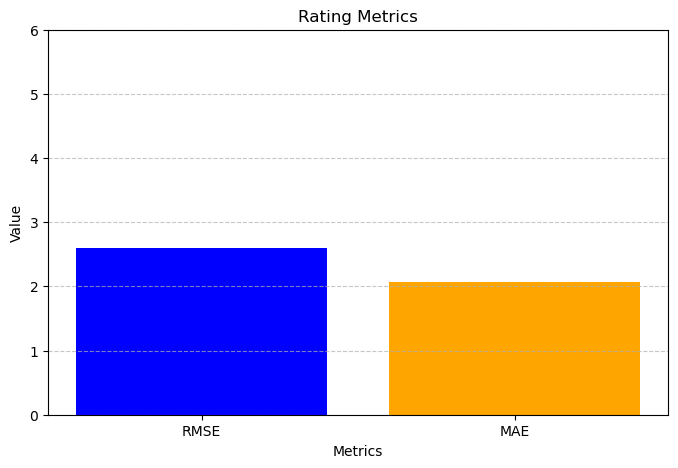

In [41]:
import matplotlib.pyplot as plt

# nilai RMSE dan MAE
rmse_value = 2.600590  
mae_value = 2.069939   

# Rating Metrics
rating_metrics = {
    "Metric": ["RMSE", "MAE"],
    "Value": [rmse_value, mae_value]  
}

plt.figure(figsize=(8, 5))
plt.bar(rating_metrics["Metric"], rating_metrics["Value"], color=['blue', 'orange'])
plt.title("Rating Metrics")
plt.ylabel("Value")
plt.xlabel("Metrics")
plt.ylim(0, 6)  # Sesuaikan dengan rentang nilai RMSE dan MAE
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Menggunakan pattern

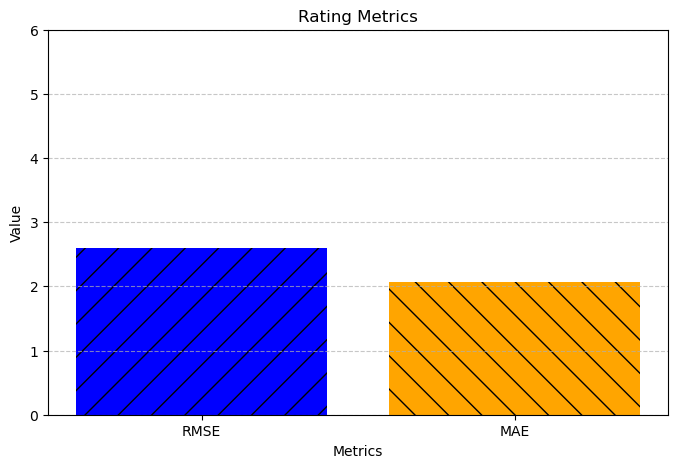

In [42]:
import matplotlib.pyplot as plt

# nilai RMSE dan MAE
rmse_value = 2.600590  
mae_value = 2.069939   

# Rating Metrics
rating_metrics = {
    "Metric": ["RMSE", "MAE"],
    "Value": [rmse_value, mae_value]  
}

plt.figure(figsize=(8, 5))

# Adding hatch patterns to the bars
plt.bar(rating_metrics["Metric"], rating_metrics["Value"], color=['blue', 'orange'], hatch=['/', '\\'])

plt.title("Rating Metrics")
plt.ylabel("Value")
plt.xlabel("Metrics")
plt.ylim(0, 6)  # Sesuaikan dengan rentang nilai RMSE dan MAE
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Kode di atas menghasilkan grafik batang untuk metrik **RMSE** dan **MAE**. Pertama, nilai **RMSE** dan **MAE** didefinisikan dalam variabel `rmse_value` dan `mae_value`. Kemudian, data tersebut dimasukkan ke dalam dictionary **`rating_metrics`** dengan kunci "Metric" untuk nama metrik dan "Value" untuk nilai metrik. Fungsi **`plt.bar()`** digunakan untuk membuat grafik batang dengan warna biru untuk RMSE dan oranye untuk MAE. Grafik ini diberi judul "Rating Metrics" dengan label sumbu y dan x yang sesuai, serta rentang sumbu y disesuaikan antara 0 dan 5 untuk menampilkan nilai yang lebih jelas. Setelah itu, grid diaktifkan pada sumbu y untuk membantu pembacaan nilai.

### Grafik Ranking Metrics (Precision, Recall, MAP)

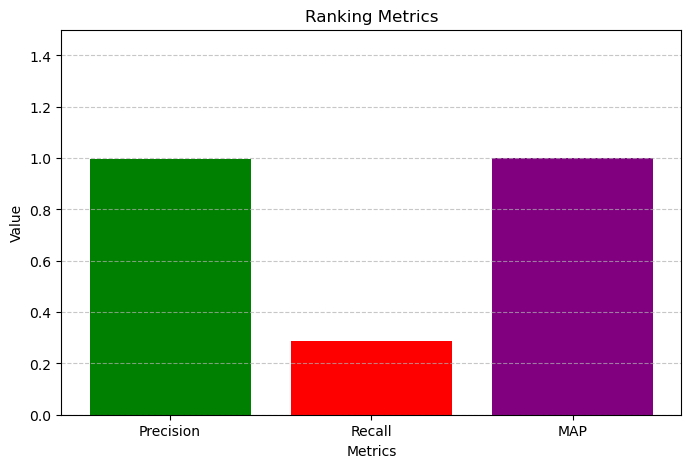

In [37]:
import matplotlib.pyplot as plt

# nilai Precision, Recall, dan MAP
precision_value = 0.994989  
recall_value = 0.288393     
map_value = 1.000000        

# Ranking Metrics
ranking_metrics = {
    "Metric": ["Precision", "Recall", "MAP"],
    "Value": [precision_value, recall_value, map_value] 
}

plt.figure(figsize=(8, 5))
plt.bar(ranking_metrics["Metric"], ranking_metrics["Value"], color=['green', 'red', 'purple'])
plt.title("Ranking Metrics")
plt.ylabel("Value")
plt.xlabel("Metrics")
plt.ylim(0, 1.5)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Menggunakan Pattern

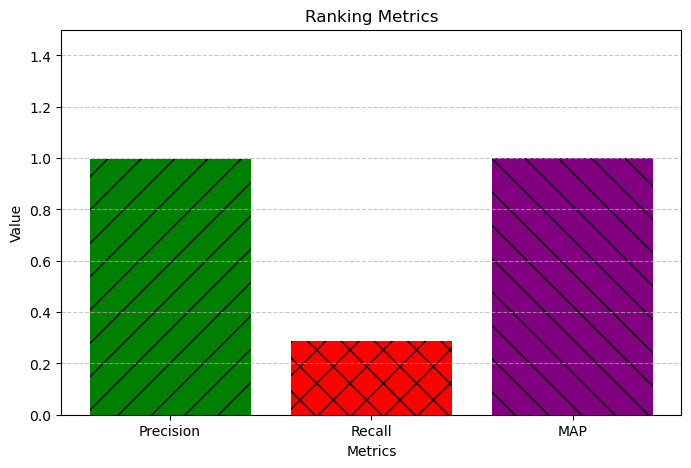

In [43]:
import matplotlib.pyplot as plt

# nilai Precision, Recall, dan MAP
precision_value = 0.994989  
recall_value = 0.288393     
map_value = 1.000000        

# Ranking Metrics
ranking_metrics = {
    "Metric": ["Precision", "Recall", "MAP"],
    "Value": [precision_value, recall_value, map_value] 
}

plt.figure(figsize=(8, 5))

# Adding hatch patterns to the bars
plt.bar(ranking_metrics["Metric"], ranking_metrics["Value"], 
        color=['green', 'red', 'purple'], 
        hatch=['/', 'x', '\\'])

plt.title("Ranking Metrics")
plt.ylabel("Value")
plt.xlabel("Metrics")
plt.ylim(0, 1.5)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Kode di atas menghasilkan grafik batang untuk metrik **Precision**, **Recall**, dan **MAP**. Nilai-nilai dari masing-masing metrik (precision = 0.994989, recall = 0.288393, map = 1.000000) dimasukkan ke dalam dictionary **`ranking_metrics`**. Grafik batang dibuat menggunakan **`plt.bar()`**, dengan warna hijau untuk Precision, merah untuk Recall, dan ungu untuk MAP. Grafik ini diberi judul "Ranking Metrics" dan label pada sumbu y dan x yang sesuai, dengan rentang sumbu y disesuaikan antara 0 dan 1.5 agar bisa menampilkan seluruh nilai metrik dengan lebih jelas. Grid juga diaktifkan di sumbu y untuk memudahkan pembacaan nilai.

## Analisis

Kesimpulan yang melibatkan dua set metrik evaluasi (**Rating Metrics** dan **Ranking Metrics**), dapat dihubungkan dengan model yang menggunakan **k-fold cross-validation** dengan **k = 10**. Berdasarkan nilai-nilai yang dihasilkan:

1. **Rating Metrics**:
   - **RMSE** (Root Mean Square Error) sebesar 2.600590 menunjukkan bahwa model memiliki kesalahan yang cukup besar dalam prediksi. RMSE yang lebih rendah biasanya diinginkan, namun angka ini menunjukkan adanya variasi yang signifikan antara prediksi dan nilai aktual.
   - **MAE** (Mean Absolute Error) sebesar 2.069939 menunjukkan bahwa rata-rata kesalahan absolut model adalah sekitar 2.07, yang memberikan gambaran lebih langsung tentang seberapa besar kesalahan prediksi.

2. **Ranking Metrics**:
   - **Precision** sebesar 0.994989 sangat tinggi, yang berarti model sangat akurat dalam memprediksi kelas positif dengan sedikit kesalahan (false positives).
   - **Recall** sebesar 0.288393 menunjukkan bahwa model kurang efektif dalam menangkap semua kasus positif yang seharusnya diprediksi, yang bisa menjadi masalah, terutama jika tujuan model adalah untuk mengidentifikasi semua prediksi relevan.
   - **MAP** (Mean Average Precision) sebesar 1.0 menunjukkan model memberikan hasil ranking yang sangat baik, dengan peringkat relevansi yang maksimal.

Secara keseluruhan, meskipun model memiliki **Precision** yang sangat tinggi, **Recall** yang rendah menunjukkan adanya kelemahan dalam mengenali seluruh sampel positif. Jika model ini diujikan menggunakan **k = 10** pada cross-validation, hal ini menunjukkan bahwa performa model mungkin bervariasi antara fold-fold yang berbeda, dengan kesalahan yang terukur baik melalui RMSE maupun MAE, tetapi dengan potensi akurasi yang sangat baik dalam hal ranking dan prediksi positif.